In [73]:
# 1.import database
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from prophet import Prophet
df = pd.read_csv('Measurement_summary.csv')
df

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...
647506,2019-12-31 19:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0
647507,2019-12-31 20:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0
647508,2019-12-31 21:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0
647509,2019-12-31 22:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.040,0.004,0.5,25.0,18.0


In [74]:
# 2.cleaning database is NULL
df['Measurement date'] = pd.to_datetime(df['Measurement date'], dayfirst = True, errors = 'coerce')
df = df.dropna(subset = ['Measurement date'])

In [75]:
df['date'] = df['Measurement date'].dt.date
df['time'] = df['Measurement date'].dt.time

C:\Users\COM\AppData\Local\Temp\ipykernel_1412\3038973313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['Measurement date'].dt.date
C:\Users\COM\AppData\Local\Temp\ipykernel_1412\3038973313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = df['Measurement date'].dt.time


In [76]:
# 3.Yearly, Monthly , Daily Average PM2.5
df_yearly = df.groupby(pd.Grouper(key='Measurement date', freq='Y'))['PM2.5'].mean()
print("ค่าเฉลี่ย PM2.5 รายปี:\n", df_yearly.head())

C:\Users\COM\AppData\Local\Temp\ipykernel_1412\3247644875.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df.groupby(pd.Grouper(key='Measurement date', freq='Y'))['PM2.5'].mean()


ค่าเฉลี่ย PM2.5 รายปี:
 Measurement date
2017-12-31    24.076273
2018-12-31    21.215139
2019-12-31    28.318878
Freq: YE-DEC, Name: PM2.5, dtype: float64


In [77]:
df_monthly = df.groupby(pd.Grouper(key='Measurement date', freq='ME'))['PM2.5'].mean()
print("ค่าเฉลี่ย PM2.5 รายเดือน:\n", df_monthly)

ค่าเฉลี่ย PM2.5 รายเดือน:
 Measurement date
2017-01-31    25.837500
2017-02-28    27.005278
2017-03-31    28.036111
2017-04-30    29.980278
2017-05-31    24.857639
2017-06-30    19.391389
2017-07-31    21.396667
2017-08-31    26.393750
2017-09-30    27.020556
2017-10-31    19.280833
2017-11-30    17.727361
2017-12-31    21.987917
2018-01-31    22.769444
2018-02-28    24.222500
2018-03-31    20.754028
2018-04-30    20.714444
2018-05-31    18.004722
2018-06-30    23.636944
2018-07-31    21.484583
2018-08-31    17.995833
2018-09-30    21.276944
2018-10-31    20.411111
2018-11-30    21.429167
2018-12-31    21.881944
2019-01-31    30.215108
2019-02-28    32.440421
2019-03-31    29.819856
2019-04-30    35.568953
2019-05-31    37.684167
2019-06-30    29.078606
2019-07-31    23.480758
2019-08-31    21.736398
2019-09-30    23.005000
2019-10-31    23.853127
2019-11-30    24.723777
2019-12-31    26.162576
Freq: ME, Name: PM2.5, dtype: float64


In [78]:
df_daily = df.groupby('Measurement date')['PM2.5'].count()
print("ค่าเฉลี่ย PM2.5 รายวัน:\n", df_daily)

ค่าเฉลี่ย PM2.5 รายวัน:
 Measurement date
2017-01-01 00:00:00    25
2017-01-01 01:00:00    25
2017-01-01 02:00:00    25
2017-01-01 03:00:00    25
2017-01-01 04:00:00    25
                       ..
2019-12-12 19:00:00    25
2019-12-12 20:00:00    25
2019-12-12 21:00:00    25
2019-12-12 22:00:00    25
2019-12-12 23:00:00    25
Name: PM2.5, Length: 10177, dtype: int64


In [79]:
# 4.Max-Min PM2.5
max_values = df.groupby('date')['PM2.5'].max()
print("ค่ามลพิษ PM2.5 มากที่สุดต่อวัน:\n", max_values)

ค่ามลพิษ PM2.5 มากที่สุดต่อวัน:
 date
2017-01-01     87.0
2017-01-02    159.0
2017-01-03     89.0
2017-01-04     40.0
2017-01-05     93.0
              ...  
2019-12-08    456.0
2019-12-09    985.0
2019-12-10    985.0
2019-12-11    126.0
2019-12-12    985.0
Name: PM2.5, Length: 427, dtype: float64


In [80]:
min_values = df.groupby('date')['PM2.5'].min()
print("ค่ามลพิษ PM2.5 น้อยที่สุดต่อวัน:\n", min_values)

ค่ามลพิษ PM2.5 น้อยที่สุดต่อวัน:
 date
2017-01-01   -1.0
2017-01-02    0.0
2017-01-03   -1.0
2017-01-04    3.0
2017-01-05   -1.0
             ... 
2019-12-08    0.0
2019-12-09   -1.0
2019-12-10    0.0
2019-12-11   -1.0
2019-12-12   -1.0
Name: PM2.5, Length: 427, dtype: float64


<Axes: xlabel='Station code'>

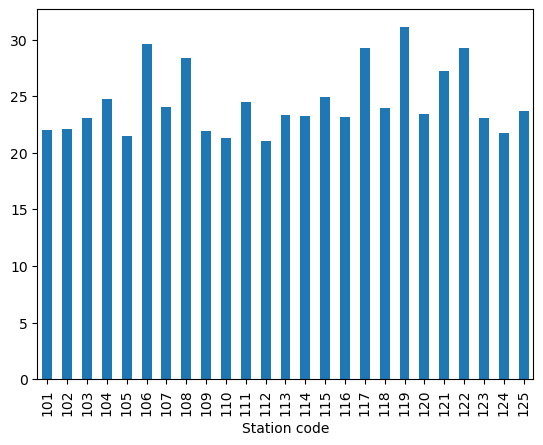

In [81]:
# 5.Comparing Pollution PM2.5 between station
df.groupby('Station code')['PM2.5'].mean().plot.bar()

In [82]:
# 6.Inspective over limit PM2.5 Date
df[df['PM2.5'] > 38][['date', 'time', 'Station code', 'PM2.5']]

,date,time,Station code,PM2.5
0,2017-01-01,00:00:00,101,57.0
1,2017-01-01,01:00:00,101,59.0
2,2017-01-01,02:00:00,101,59.0
3,2017-01-01,03:00:00,101,58.0
4,2017-01-01,04:00:00,101,61.0
...,...,...,...,...
647018,2019-11-12,11:00:00,125,114.0
647019,2019-11-12,12:00:00,125,88.0
647020,2019-11-12,13:00:00,125,61.0
647021,2019-11-12,14:00:00,125,60.0


In [83]:
# 7.correlation between PM2.5 and PM10
corr_25_10 = df['PM2.5'].corr(df['PM10'])
print(f"correlation between PM2.5 and PM10: {corr_25_10:.2f}")

correlation between PM2.5 and PM10: 0.21


In [84]:
df['Measurement date'] = pd.to_datetime(df['Measurement date'])

C:\Users\COM\AppData\Local\Temp\ipykernel_1412\1441632515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Measurement date'] = pd.to_datetime(df['Measurement date'])


In [85]:
# 8.Comparison average PM2.5 in Day and Night
day_start = 6
day_end = 18
df.loc[:, 'Day/Night'] = df['Measurement date'].dt.hour.apply(
    lambda x: 'Day' if day_start <= x < day_end else 'Night'
)

C:\Users\COM\AppData\Local\Temp\ipykernel_1412\4267682304.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Day/Night'] = df['Measurement date'].dt.hour.apply(


In [86]:
day_night_avg_pm25 = df.groupby('Day/Night')['PM2.5'].mean()
print("Average PM2.5 Day and Night:\n", day_night_avg_pm25)

Average PM2.5 Day and Night:
 Day/Night
Day      24.189661
Night    24.742818
Name: PM2.5, dtype: float64


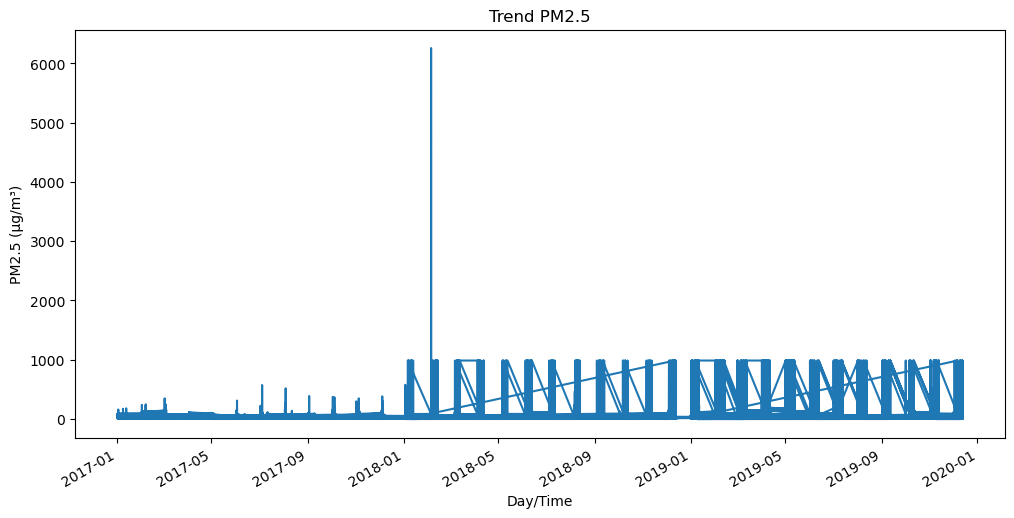

In [87]:
# 9.Analysis Trend in PM2.5
df.set_index('Measurement date')['PM2.5'].plot(figsize=(12,6))
plt.title('Trend PM2.5')
plt.xlabel('Day/Time')
plt.ylabel('PM2.5 (μg/m³)')
plt.show()

C:\Users\COM\AppData\Local\Temp\ipykernel_1412\475591253.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
C:\Users\COM\AppData\Local\Temp\ipykernel_1412\475591253.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['date'].dt.hour
C:\Users\COM\AppData\Local\Temp\ipykernel_1412\475591253.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

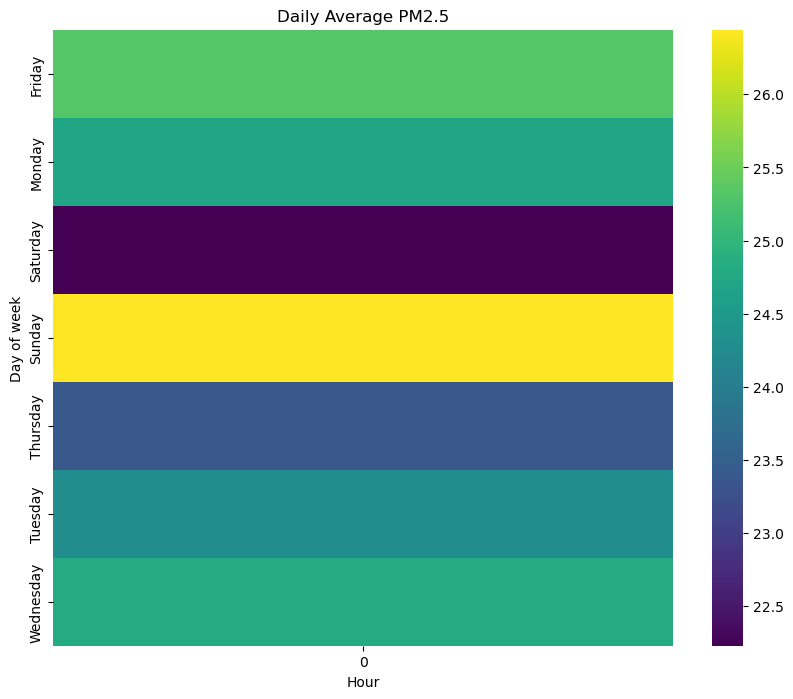

In [88]:
# 10.Create Heatmap in PM2.5
import seaborn as sns
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['date_of_week'] = df['date'].dt.day_name()
heatmap_data = df.pivot_table(values='PM2.5', index='date_of_week', columns='hour', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Daily Average PM2.5')
plt.xlabel('Hour')
plt.ylabel('Day of week')
plt.show()

In [89]:
# 11.Geoplot
import folium
avg_pm25_by_station = df.groupby(['Latitude', 'Longitude'])['PM2.5'].mean().reset_index()
m = folium.Map(location=[37.55,  126.97], zoom_start=6)
for index, row in avg_pm25_by_station.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['PM2.5'] / 5,
        color='red',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        tooltip=f"PM2.5: {row['PM2.5']:.2f}"
    ).add_to(m)
m

In [90]:
# 12. Time Series Forecasting with Prophet
data = {
    'date': pd.to_datetime(pd.date_range(start='2017-01-31', end='2019-12-31', freq='M')),
    'Measurement': np.random.rand(36)*10+20
}
df = pd.DataFrame(data)
df = df.set_index('date')
df_quarterly = df.resample('Q').mean()
print(df_quarterly)

            Measurement
date                   
2017-03-31    23.131969
2017-06-30    25.492837
2017-09-30    24.620082
2017-12-31    27.726846
2018-03-31    27.445180
2018-06-30    23.717936
2018-09-30    24.164214
2018-12-31    27.124189
2019-03-31    23.340365
2019-06-30    21.982398
2019-09-30    25.981246
2019-12-31    23.556471


C:\Users\COM\AppData\Local\Temp\ipykernel_1412\1790207114.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'date': pd.to_datetime(pd.date_range(start='2017-01-31', end='2019-12-31', freq='M')),
C:\Users\COM\AppData\Local\Temp\ipykernel_1412\1790207114.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = df.resample('Q').mean()


In [91]:
df_quarterly = pd.DataFrame({
    'ds': pd.to_datetime(['2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
                          '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
                          '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31']),
    'y': [27.304163, 28.459581, 26.960519, 28.546121, 25.503969,
          27.059117, 24.836402, 26.706351, 23.936015, 26.894641,
          25.660560, 27.117863]})

In [92]:
m = Prophet()
m.fit(df_quarterly)

21:30:06 - cmdstanpy - INFO - Chain [1] start processing
21:30:16 - cmdstanpy - INFO - Chain [1] done processing


In [93]:
future = m.make_future_dataframe(periods=36, freq='Q')
forecast = m.predict(future)
print(" Forecast PM2.5 (first 5 and last 5 rows)")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
forecast_tail = forecast[forecast['ds'] > df_quarterly['ds'].max()]
print(forecast_tail[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

 Forecast PM2.5 (first 5 and last 5 rows)
          ds       yhat  yhat_lower  yhat_upper
0 2017-03-31  27.303212   27.303212   27.303212
1 2017-06-30  28.459956   28.459956   28.459956
2 2017-09-30  26.961798   26.961798   26.961798
3 2017-12-31  28.545826   28.545826   28.545826
4 2018-03-31  25.503031   25.503031   25.503031
           ds       yhat  yhat_lower  yhat_upper
43 2027-12-31  -3.701438  -18.279006   10.854347
44 2028-03-31 -25.052355  -40.311336   -9.854503
45 2028-06-30 -23.415884  -39.238546   -7.342546
46 2028-09-30 -22.654007  -39.411327   -5.936260
47 2028-12-31 -21.735601  -39.342121   -4.278793
           ds       yhat  yhat_lower  yhat_upper
12 2020-03-31   5.766717    5.702016    5.829885
13 2020-06-30   7.403188    7.200636    7.614358
14 2020-09-30   8.165065    7.778068    8.554472
15 2020-12-31   9.083471    8.443072    9.678837
16 2021-03-31   7.029621    6.092706    7.869369
17 2021-06-30   8.847203    7.640937    9.940587
18 2021-09-30   8.017144    6.502

C:\Users\COM\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(


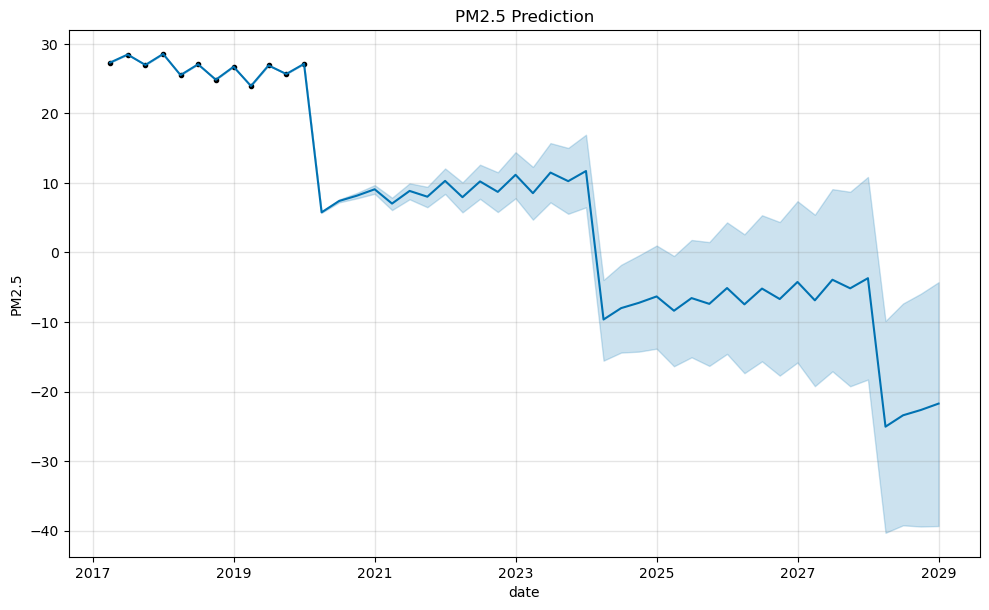

In [94]:
fig = m.plot(forecast)
plt.title('PM2.5 Prediction')
plt.xlabel('date')
plt.ylabel('PM2.5')
plt.show()

In [95]:
pip install pandas scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


In [96]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [97]:
# 13.Machine Learning with XGBoost
np.random.seed(42)
dates = pd.to_datetime(pd.date_range(start='2023-01-01', periods=365, freq='D'))
df = pd.DataFrame({
    'date': dates,
    'NO2': np.random.normal(30, 5, 365),
    'O3': np.random.normal(40, 8, 365),
    'PM25': np.random.normal(50, 10, 365)
})
df['PM25'] = df['PM25'] + 0.5 * df['NO2'] + 0.3 * df['O3']

x = df[['NO2', 'O3']]
y = df['PM25']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

new_data = pd.DataFrame({'NO2': [35, 25], 'O3': [45, 30]})
new_predictions = model.predict(new_data)
print("\nPM2.5 Prediction from New Date:")
print(f"if NO2 = 35, 03 = 45 --> PM2.5 = {new_predictions[0]:.2f}")
print(f"if NO2 = 25, 03 = 30 --> PM2.5 = {new_predictions[1]:.2f}")

Mean Squared Error (MSE): 124.88
R-squared (R2): -0.08

PM2.5 Prediction from New Date:
if NO2 = 35, 03 = 45 --> PM2.5 = 75.92
if NO2 = 25, 03 = 30 --> PM2.5 = 79.21


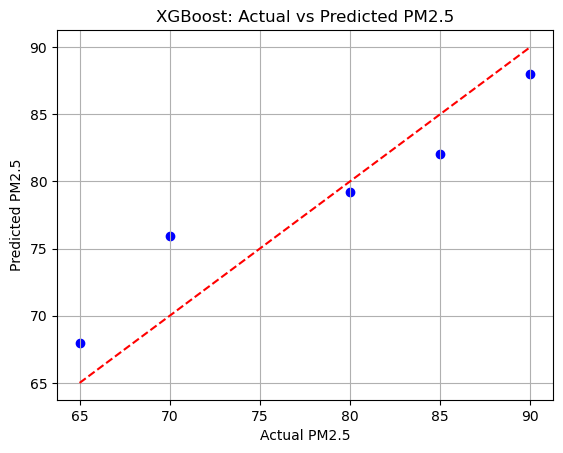

In [114]:
y_test = [70, 80, 65, 90, 85]
y_pred = [75.92, 79.21, 68, 88, 82]

plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('XGBoost: Actual vs Predicted PM2.5')
plt.grid(True)
plt.show()

In [98]:
pip install pandas scikit-learn tensorflow

Note: you may need to restart the kernel to use updated packages.


In [99]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [100]:
# 14.Machine Learning with LSTM / GRU
data = pd.DataFrame({'PM25': np.random.rand(1000) * 100})

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['PM25'].values.reshape(-1, 1))

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10
x, y = create_dataset(scaled_data, look_back)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x, y, epochs=10, batch_size=1, verbose=2)

last_sequence = scaled_data[-look_back:]
predicted_value = model.predict(last_sequence.reshape(1, look_back,1))
predicted_value = scaler.inverse_transform(predicted_value)
print(f"\n Forecasting PM2.5 for next time: {predicted_value[0][0]:.2f}")

Epoch 1/10


C:\Users\COM\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


989/989 - 6s - 6ms/step - loss: 0.0912
Epoch 2/10
989/989 - 3s - 3ms/step - loss: 0.0849
Epoch 3/10
989/989 - 3s - 3ms/step - loss: 0.0840
Epoch 4/10
989/989 - 4s - 4ms/step - loss: 0.0849
Epoch 5/10
989/989 - 5s - 5ms/step - loss: 0.0843
Epoch 6/10
989/989 - 3s - 3ms/step - loss: 0.0839
Epoch 7/10
989/989 - 3s - 3ms/step - loss: 0.0829
Epoch 8/10
989/989 - 3s - 3ms/step - loss: 0.0830
Epoch 9/10
989/989 - 4s - 4ms/step - loss: 0.0831
Epoch 10/10
989/989 - 6s - 6ms/step - loss: 0.0829
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step

 Forecasting PM2.5 for next time: 47.97


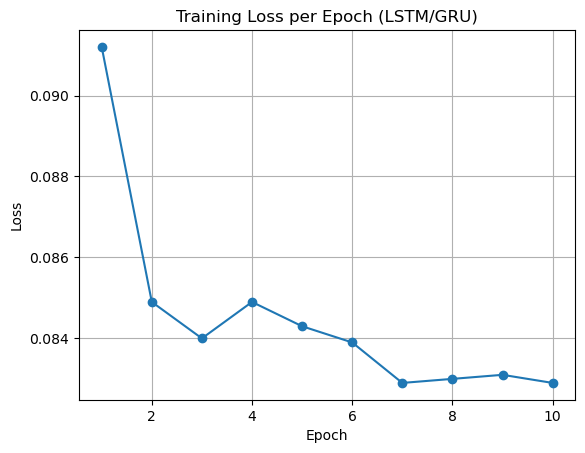

In [113]:
loss_values = [0.0912, 0.0849, 0.0840, 0.0849, 0.0843, 0.0839, 0.0829, 0.0830, 0.0831, 0.0829]

plt.plot(range(1, 11), loss_values, marker='o')
plt.title('Training Loss per Epoch (LSTM/GRU)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [101]:
pip install xgboost

In [111]:
# 14.Scenario Simulation
scenario_data = df.copy()
scenario_data['NO2_reduced'] = scenario_data['NO2'] * 0.9
def create_sequence_data(data, look_back):
    x = []
    for i in range(len(data) - look_back + 1):
        a = data[i:(i + look_back)]
        x.append(a)
    return np.array(x)

look_back = 10

baseline_features = create_sequence_data(
    scenario_data[['NO2', 'O3']].values, look_back
)

scenario_features = create_sequence_data(
    scenario_data[['NO2_reduced', 'O3']].values, look_back
)

print("ฺBaseline features:", baseline_features.shape)
print("Scenario features:", scenario_features.shape)


ฺBaseline features: (356, 10, 2)
Scenario features: (356, 10, 2)


In [112]:
baseline_prediction = model.predict(baseline_features)
scenario_prediction = model.predict(scenario_features)
    
average_pm25_baseline = np.mean(baseline_prediction)
average_pm25_scenario = np.mean(scenario_prediction)
percentage_change = ((average_pm25_scenario - average_pm25_baseline) / average_pm25_baseline) * 100

print("\n Scenario Simulation ")
print(f"Average PM2.5 in Normal: {average_pm25_baseline:.2f}")
print(f"Average PM2.5 if decreased 10% : {average_pm25_scenario:.2f}")
print(f"PM2.5 decreased: {percentage_change:.2f}%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

 Scenario Simulation 
Average PM2.5 in Normal: 0.20
Average PM2.5 if decreased 10% : 0.18
PM2.5 decreased: -9.62%


C:\Users\COM\AppData\Local\Temp\ipykernel_1412\2400295726.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Scenario', y='Average PM2.5', data=summary_df, palette='coolwarm')


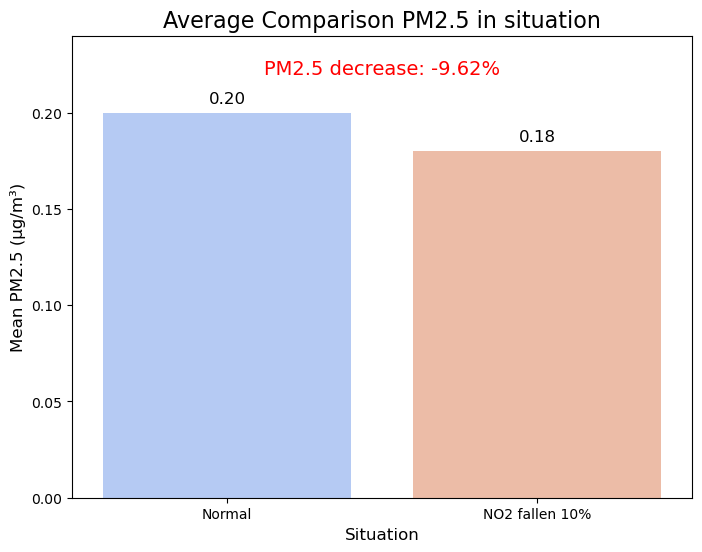

In [117]:
pm25_normal = 0.20
pm25_scenario = 0.18
percentage_change = -9.62

summary_df = pd.DataFrame({
    'Scenario': ['Normal', 'NO2 fallen 10%'],
    'Average PM2.5': [pm25_normal, pm25_scenario]
})
plt.figure(figsize=(8, 6))
sns.barplot(x='Scenario', y='Average PM2.5', data=summary_df, palette='coolwarm')
plt.title('Average Comparison PM2.5 in situation', fontsize=16)
plt.xlabel('Situation', fontsize=12)
plt.ylabel('Mean PM2.5 (µg/m³)', fontsize=12)
plt.ylim(0, max(summary_df['Average PM2.5']) * 1.2)
for index, row in summary_df.iterrows():
    plt.text(index, row['Average PM2.5'] + 0.005, f"{row['Average PM2.5']:.2f}", ha='center', fontsize=12)
plt.text(0.5, max(summary_df['Average PM2.5']) * 1.1, f"PM2.5 decrease: {percentage_change:.2f}%", ha='center', fontsize=14, color='red')
plt.show()

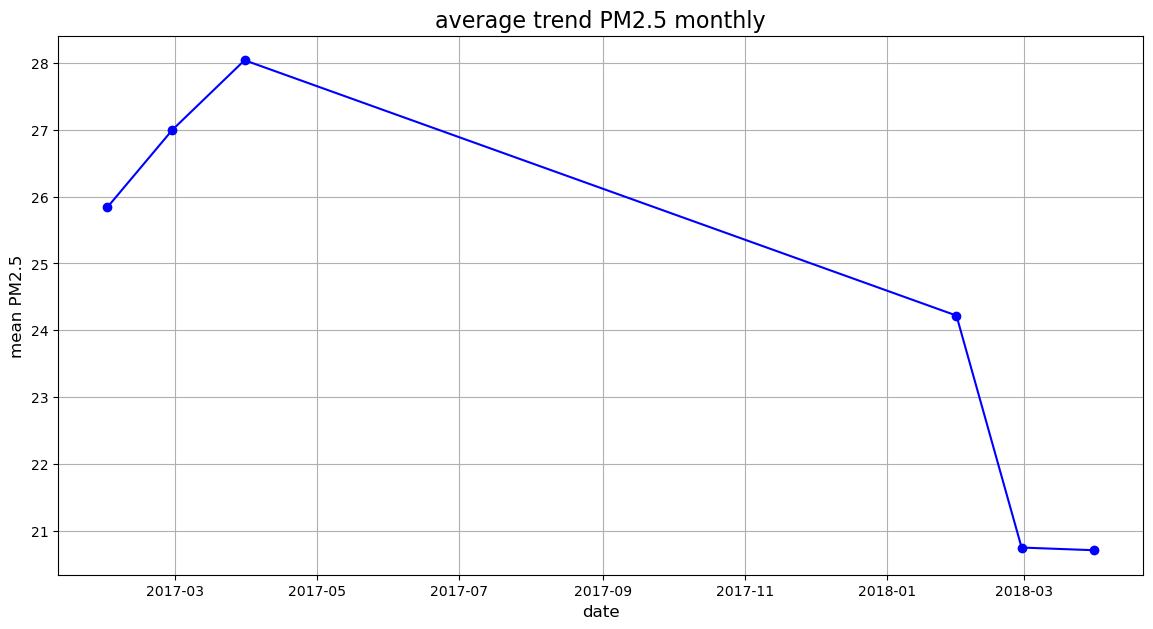

In [118]:
data = {
    'Measurement date': pd.to_datetime(['2017-01-31', '2017-02-28', '2017-03-31', '2018-01-31', '2018-02-28', '2018-03-31']),
    'PM2.5': [25.84, 27.00, 28.04, 24.22, 20.75, 20.71]
}
df_monthly = pd.DataFrame(data)

plt.figure(figsize=(14, 7))
plt.plot(df_monthly['Measurement date'], df_monthly['PM2.5'], marker='o', linestyle='-', color='blue')
plt.title('average trend PM2.5 monthly', fontsize=16)
plt.xlabel('date', fontsize=12)
plt.ylabel('mean PM2.5', fontsize=12)
plt.grid(True)
plt.show()